# Numpy 테크닉 2

# 1. 배열 합치기

In [1]:
import numpy as np
import numpy.random as npr

In [6]:
array_1 = [[1,2],
           [3,4]]
array_2 = [[5,6],
           [7,8]]

In [7]:
array_1

[[1, 2], [3, 4]]

## concatenate 행과 열로 합치기

In [8]:
np.concatenate((array_1, array_2))

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [9]:
np.concatenate((array_1,array_2), axis=1)

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

In [10]:
x = npr.randint(20,size=20).reshape(10,2)
y = np.arange(10)

In [11]:
# 배열의 크기가 다르면 합쳐지지 않는다
np.concatenate((x,y))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

## append 함수도 마찬가지

In [12]:
z = np.append(x,y)

the resulting array is "flattened"

## reshape()로 차원의 크기 변경

In [13]:
z = z.reshape(10,3)
print(z)
print(z.shape)

[[15 19 16]
 [ 9  9 10]
 [10 18 11]
 [14  9  6]
 [12  2  6]
 [14 15  9]
 [18  3  0]
 [ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]]
(10, 3)


# 2. 1차원 배열 만들기 (Flattening Arrays)

In [14]:
arr = np.arange(27).reshape(3,3,3)
arr

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [15]:
arr.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

## .flat = value 값 바꾸기

In [19]:
arr_copy = arr.copy()
arr_copy.flat = 3
arr_copy

array([[[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]]])

## 인덱스 지정으로 값 바꾸기

In [20]:
arr_copy.flat[[1,4,7,10]] = 1
arr_copy

array([[[3, 1, 3],
        [3, 1, 3],
        [3, 1, 3]],

       [[3, 1, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]]])

In [21]:
arr_copy.flat[1:9] = 0
arr_copy

array([[[3, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[3, 1, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]]])

In [23]:
# reshape로 2차원 배열로
arr.reshape(-1,3)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20],
       [21, 22, 23],
       [24, 25, 26]])

# 3. Boolean 조건 배열

In [3]:
import numpy.random as npr
import matplotlib.pyplot as plt

## dtype 파라미터로 Bool 만들기

In [4]:
print(np.full(4, True, dtype=bool))
print(np.ones(4, dtype=bool))
print(np.zeros(4,dtype=bool))

[ True  True  True  True]
[ True  True  True  True]
[False False False False]


In [5]:
npr.randint(0,2, size=10, dtype=bool)

array([False, False, False,  True,  True, False,  True,  True, False,
        True])

In [6]:
# normal(평균값, 표준편차, 사이즈=n)
data = npr.normal(100, 15, 25)
data

array([ 74.65975116, 102.27300266,  80.61225752, 110.22750853,
       127.17184909,  97.73703006, 105.98772893,  72.49996121,
        92.27023006,  92.90561769, 118.17440741, 108.47306074,
       112.43476434,  96.75635178,  95.5744885 ,  92.12821941,
        88.16168069, 100.5787267 ,  81.44177612, 123.80644803,
        89.94962088,  85.43266072,  86.88373733,  90.91734886,
       114.52966042])

(array([2., 2., 3., 5., 3., 2., 3., 2., 1., 2.]),
 array([ 72.49996121,  77.96715   ,  83.43433879,  88.90152758,
         94.36871636,  99.83590515, 105.30309394, 110.77028273,
        116.23747152, 121.7046603 , 127.17184909]),
 <a list of 10 Patch objects>)

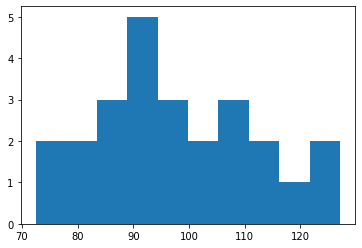

In [7]:
plt.hist(data)

In [8]:
mask = data > 100
mask

array([False,  True, False,  True,  True, False,  True, False, False,
       False,  True,  True,  True, False, False, False, False,  True,
       False,  True, False, False, False, False,  True])

In [9]:
data[mask]

array([102.27300266, 110.22750853, 127.17184909, 105.98772893,
       118.17440741, 108.47306074, 112.43476434, 100.5787267 ,
       123.80644803, 114.52966042])

## 조건을 위한 logical 함수  (all, any, allclose)
https://docs.scipy.org/doc/numpy/reference/routines.logic.html

In [10]:
mask = np.logical_and(data > 100, data <110)
data[mask]

array([102.27300266, 105.98772893, 108.47306074, 100.5787267 ])

In [11]:
mask= np.logical_or(data > 115, data <85)
data[mask]

array([ 74.65975116,  80.61225752, 127.17184909,  72.49996121,
       118.17440741,  81.44177612, 123.80644803])

In [12]:
rand = npr.randint(1,11, 25)
rand

array([ 7,  3,  3,  1,  5,  2,  2,  7,  3,  3,  6,  8,  6,  1,  3,  3,  6,
        6,  3,  4,  1,  5, 10,  4,  1])

In [13]:
close = data + rand
close

array([ 81.65975116, 105.27300266,  83.61225752, 111.22750853,
       132.17184909,  99.73703006, 107.98772893,  79.49996121,
        95.27023006,  95.90561769, 124.17440741, 116.47306074,
       118.43476434,  97.75635178,  98.5744885 ,  95.12821941,
        94.16168069, 106.5787267 ,  84.44177612, 127.80644803,
        90.94962088,  90.43266072,  96.88373733,  94.91734886,
       115.52966042])

In [15]:
data

array([ 74.65975116, 102.27300266,  80.61225752, 110.22750853,
       127.17184909,  97.73703006, 105.98772893,  72.49996121,
        92.27023006,  92.90561769, 118.17440741, 108.47306074,
       112.43476434,  96.75635178,  95.5744885 ,  92.12821941,
        88.16168069, 100.5787267 ,  81.44177612, 123.80644803,
        89.94962088,  85.43266072,  86.88373733,  90.91734886,
       114.52966042])

In [16]:
# np.allclose( )는 np.random으로 만든 변수를 비교할 때 사용하고 atol은 톨레랑스값
np.allclose(data, close, atol=10)

True

In [17]:
# np.isclose( )는 np.random으로 만든 각 개체를 비교할 때 사용하고 atol은 톨레랑스값
np.isclose(data, close, atol=5)

array([False,  True,  True,  True,  True,  True,  True, False,  True,
        True, False, False, False,  True,  True,  True, False, False,
        True,  True,  True,  True, False,  True,  True])

# 4. 통계 및 수학 함수

In [32]:
data = tuple(range(10))
np.multiply(data, data)

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [39]:
data = np.arange(10)
np.multiply(data, data, where= data > 3)

array([ 0,  1,  2,  3, 16, 25, 36, 49, 64, 81])

In [33]:
data = np.arange(20).reshape(2,10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [34]:
np.sum(data, axis=1)

array([ 45, 145])

In [35]:
np.sum(data, axis=0)

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])

In [42]:
months = np.arange(1,37)
months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36])

In [75]:
conv =np.mod(months, 3)
conv

array([1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1,
       2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0])

In [76]:
print(len(conv))

36


In [77]:
conv

array([1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1,
       2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0])

In [78]:
conv == 0

array([False, False,  True, False, False,  True, False, False,  True,
       False, False,  True, False, False,  True, False, False,  True,
       False, False,  True, False, False,  True, False, False,  True,
       False, False,  True, False, False,  True, False, False,  True])

In [79]:
mask = conv == 0
conv[mask] = 12
conv

array([ 1,  2, 12,  1,  2, 12,  1,  2, 12,  1,  2, 12,  1,  2, 12,  1,  2,
       12,  1,  2, 12,  1,  2, 12,  1,  2, 12,  1,  2, 12,  1,  2, 12,  1,
        2, 12])

## 합치기

In [45]:
np.multiply.reduce(np.arange(1,6))

120

In [81]:
np.random.seed(0)
data = np.log(1+npr.normal(0,.015, size=21))
data

array([ 0.02611675,  0.00598442,  0.01457435,  0.03306082,  0.02762817,
       -0.01476768,  0.01415073, -0.00227294, -0.00154948,  0.00614009,
        0.00215832,  0.02157958,  0.0113509 ,  0.00182346,  0.00663588,
        0.00499263,  0.02216375, -0.00308212,  0.00468502, -0.01289421,
       -0.03904737])

In [82]:
np.add.accumulate(data)

array([0.02611675, 0.03210117, 0.04667552, 0.07973633, 0.10736451,
       0.09259683, 0.10674756, 0.10447462, 0.10292514, 0.10906523,
       0.11122355, 0.13280313, 0.14415403, 0.14597749, 0.15261337,
       0.157606  , 0.17976975, 0.17668763, 0.18137265, 0.16847844,
       0.12943108])

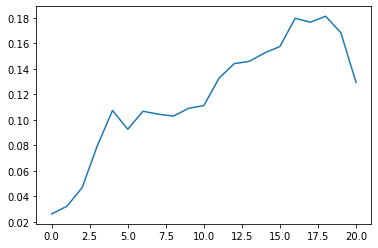

In [83]:
plt.plot(np.add.accumulate(data))
plt.show()

In [84]:
data.cumsum()

array([0.02611675, 0.03210117, 0.04667552, 0.07973633, 0.10736451,
       0.09259683, 0.10674756, 0.10447462, 0.10292514, 0.10906523,
       0.11122355, 0.13280313, 0.14415403, 0.14597749, 0.15261337,
       0.157606  , 0.17976975, 0.17668763, 0.18137265, 0.16847844,
       0.12943108])

# 5. np.where

In [90]:
np.random.seed(0)
data = npr.normal(0, 0.015, size = 252)
data

array([ 0.02646079,  0.00600236,  0.01468107,  0.0336134 ,  0.02801337,
       -0.01465917,  0.01425133, -0.00227036, -0.00154828,  0.00615898,
        0.00216065,  0.0218141 ,  0.01141557,  0.00182513,  0.00665795,
        0.00500511,  0.02241119, -0.00307737,  0.00469602, -0.01281144,
       -0.03829485,  0.00980428,  0.01296654, -0.01113248,  0.03404632,
       -0.02181549,  0.00068638, -0.00280776,  0.02299169,  0.02204038,
        0.00232421,  0.00567244, -0.01331679, -0.02971195, -0.00521868,
        0.00234523,  0.01845436,  0.0180357 , -0.0058099 , -0.00453454,
       -0.01572829, -0.02130027, -0.02559405,  0.02926163, -0.00764478,
       -0.00657111, -0.01879193,  0.01166236, -0.02420847, -0.0031911 ,
       -0.013432  ,  0.00580354, -0.00766208, -0.01770948, -0.00042273,
        0.00642498,  0.00099776,  0.00453708, -0.00951483, -0.00544112,
       -0.01008691, -0.0053933 , -0.01219719, -0.02589424,  0.00266139,
       -0.00602671, -0.02445298,  0.00694173, -0.01360948,  0.00

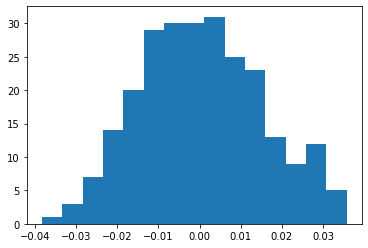

In [88]:
plt.hist(data, bins=15)
plt.show()

In [89]:
positive = np.where(data > 0, True, False)
positive

array([ True,  True,  True,  True,  True, False,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False, False,  True,  True, False,  True, False,  True,
       False,  True,  True,  True,  True, False, False, False,  True,
        True,  True, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True,  True,  True, False, False, False, False, False,
       False,  True, False, False,  True, False,  True,  True,  True,
        True, False,  True, False, False, False, False,  True, False,
        True,  True, False,  True,  True,  True, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True, False,  True, False, False,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True,

In [92]:
# 0 보다 큰 값 갯수 평균 구하기
print(len(data[positive]))
print("{:.2%}".format(data[positive].mean()))

127
1.26%


In [93]:
# '~' 표시로 반대 조건 평균값
print(len(data[~positive]))
print("{:.2%}".format(data[~positive].mean()))

125
-1.18%


## 특정 값 대체하여 채워 넣기

In [96]:
np.random.seed(0)
x = npr.standard_normal(20)
y = np.arange(20)

In [97]:
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574])

In [98]:
y

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [99]:
np.where(x < 0, y , x)

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
        5.        ,  0.95008842,  7.        ,  8.        ,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, 17.        ,  0.3130677 , 19.        ])